# Mental Health in the Tech Industry  
## **Exploratory Data Analysis**
---
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#removes the unwanted warnings for better presentation
import warnings
warnings.filterwarnings('ignore')
print("Libraries successfully imported and ready to use 💪")

Libraries successfully imported and ready to use 💪


### Setting pre-defined plot style and settings

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 12

### Data loading and initial look

In [3]:
df = pd.read_csv("survey.csv")

print("\t\t\t---Initial insights in the Data---")
print("\n",df.info())
print("\nChecking the null values...\n")
print(df.isnull().sum())

			---Initial insights in the Data---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options             

In [4]:
print("\nRandom 5 rows of the dataset:")
df.sample(5)
#Even after random selection most probably atleast one row with United States as the country will be present
#We'll look in the visualisation part how majority responses come from the US


Random 5 rows of the dataset:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
100,2014-08-27 12:18:14,26,female,Canada,NaN,No,Yes,Yes,Sometimes,26-100,...,Very difficult,Yes,No,No,No,No,Maybe,No,Yes,In my previous workplace which had mental heal...
270,2014-08-27 13:55:38,30,Male,Ireland,NaN,Yes,No,No,Sometimes,1-5,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
1104,2014-08-29 23:51:01,45,M,United States,CA,No,No,No,Never,6-25,...,Don't know,Yes,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
1206,2015-02-21 06:19:41,34,Male,United Kingdom,NaN,No,Yes,No,Often,26-100,...,Somewhat easy,Maybe,No,Some of them,Yes,Maybe,Yes,Yes,No,NaN
211,2014-08-27 13:06:12,37,Male,United Kingdom,NaN,No,Yes,No,Sometimes,26-100,...,Don't know,Yes,Maybe,Some of them,Yes,No,Maybe,Don't know,No,NaN


## Data Preprocessing and cleaning starts!
---

### Included only techies

In [5]:
old_rows = df.shape[0]
df = df[(df['tech_company'] == 'Yes')]
df = df.drop("tech_company", axis=1)
print("-Included ONLY those employees working in tech industry since the objective for our model is for tech guys only")
print("\nRows reduced =",old_rows-df.shape[0])

-Included ONLY those employees working in tech industry since the objective for our model is for tech guys only

Rows reduced = 228


### Removed some useless columns

In [6]:
df.drop(['Timestamp', 'state' ,'comments'], axis=1, inplace=True)

print("-Removed three not useful columns: Timestamp, state and comments")
print("Shape of dataset: ",df.shape)

-Removed three not useful columns: Timestamp, state and comments
Shape of dataset:  (1031, 23)


### Age column cleaning

In [7]:
print("Age column before cleaning...")
print(df['Age'].describe())

df_new = df[(df['Age'] >= 18) & (df['Age'] <= 75)]

print("\nAge column after cleaning...")
print(df_new['Age'].describe())
print("\n#Age column looks good than before")
print("-"*69)
row_age = df.shape[0] - df_new.shape[0]
print("Rows reduced =",row_age)

Age column before cleaning...
count    1.031000e+03
mean     9.699324e+07
std      3.114373e+09
min     -1.000000e+00
25%      2.700000e+01
50%      3.100000e+01
75%      3.500000e+01
max      1.000000e+11
Name: Age, dtype: float64

Age column after cleaning...
count    1025.000000
mean       31.878049
std         7.151114
min        18.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        62.000000
Name: Age, dtype: float64

#Age column looks good than before
---------------------------------------------------------------------
Rows reduced = 6


In [8]:
print(df_new['Gender'].unique())

['Female' 'Male' 'M' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'Mal'
 'Male (CIS)' 'f' 'queer/she/they' 'non-binary' 'Femake' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'male leaning androgynous' 'Male ' 'Man' 'msle' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'Cis Man']


### Gender column cleaning

In [9]:

gender_map = {
    'Male': ['Male', 'male', 'Male ', 'M', 'm', 'Male-ish', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Man', 'msle', 'Mail', 'Malr', 'Cis Man', 'cis male', 'something kinda male?', 'Guy (-ish) ^_^'],
    'Female': ['Female', 'female', 'Female ', 'F', 'f', 'Woman', 'woman', 'Femake', 'Cis Female', 'cis-female/femme', 'Female (cis)', 'femail'],
    'Other': ['non-binary', 'queer/she/they', 'queer', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender', 'Trans-female', 'Trans woman', 'Female (trans)', 'Neuter', 'male leaning androgynous', 'ostensibly male, unsure what that really means']
}
df_new = df_new[df_new['Gender'] != 'Nah']
inv_gender_map = {val: key for key, vals in gender_map.items() for val in vals}
df_new['Gender'] = df_new['Gender'].map(inv_gender_map)
print("Gender column cleaned!")
print("Now it has only 3 unique values: ",df_new['Gender'].unique())
print("\nValue Counts:")
print(df_new['Gender'].value_counts())

Gender column cleaned!
Now it has only 3 unique values:  ['Female' 'Male' 'Other']

Value Counts:
Gender
Male      825
Female    188
Other      11
Name: count, dtype: int64


### self_employed and work_interfere columns cleaning

In [10]:
print("\t\tSome insights into 'self_employed' column\n")
print("Unique values: ",df_new['self_employed'].unique())
print("Their frequency:")
print(df_new['self_employed'].value_counts(),"\n")
print("-"*69)

print("\n\t\tSome insights into 'work_interfere' column\n")
print("Unique values: ",df_new['work_interfere'].unique())
print("Their frequency:")
print(df_new['work_interfere'].value_counts(),"\n")
print("-"*69)

#handling null values
df_new['self_employed'].fillna(df_new['self_employed'].mode()[0], inplace=True)
df_new['work_interfere'].fillna(df_new['work_interfere'].mode()[0], inplace=True)

print("\n-Null values in 'self_employed' is likely a 'No' so they are replaced by the most common value (mode), which is 'No' as we can observe.")
print("-Null values in 'work_interfere' are replaced by the mode ('Sometimes') as it's the most likely response.")

		Some insights into 'self_employed' column

Unique values:  [nan 'Yes' 'No']
Their frequency:
self_employed
No     881
Yes    127
Name: count, dtype: int64 

---------------------------------------------------------------------

		Some insights into 'work_interfere' column

Unique values:  ['Often' 'Rarely' 'Never' 'Sometimes' nan]
Their frequency:
work_interfere
Sometimes    386
Never        177
Rarely       137
Often        109
Name: count, dtype: int64 

---------------------------------------------------------------------

-Null values in 'self_employed' is likely a 'No' so they are replaced by the most common value (mode), which is 'No' as we can observe.
-Null values in 'work_interfere' are replaced by the mode ('Sometimes') as it's the most likely response.


In [11]:
print("#Null Values handled successfully!\n")
print(df_new.isnull().sum())

#Null Values handled successfully!

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


### A look into the number of employees column

In [12]:
print("Total rows in dataset:",df_new.shape[0])
print("Unique values in number of employees column:",df_new['no_employees'].unique())
print("Null values in this column:",df_new['no_employees'].isnull().sum())
print("Value counts:\n")
print(df_new['no_employees'].value_counts())
print("\n#Hence the no_employees column is perfectly segregated and doesn't need any preprocessing for now.")

Total rows in dataset: 1024
Unique values in number of employees column: ['6-25' '26-100' '100-500' '1-5' '500-1000' 'More than 1000']
Null values in this column: 0
Value counts:

no_employees
6-25              267
26-100            242
More than 1000    192
1-5               147
100-500           135
500-1000           41
Name: count, dtype: int64

#Hence the no_employees column is perfectly segregated and doesn't need any preprocessing for now.


In [ ]:
#since we have already dealt with them
exclude = ['Age', 'Gender', 'state', 'Country', 'self_employed', 'work_interfere', 'no_employees']

for column in df_new.columns:
  if column not in exclude:
    print(f"    Value Counts for {column}    ")
    print(df_new[column].value_counts())
    print("\n"+"-"*42+"\n")

    Value Counts for family_history    
family_history
No     636
Yes    388
Name: count, dtype: int64

------------------------------------------

    Value Counts for treatment    
treatment
No     515
Yes    509
Name: count, dtype: int64

------------------------------------------

    Value Counts for remote_work    
remote_work
No     692
Yes    332
Name: count, dtype: int64

------------------------------------------

    Value Counts for benefits    
benefits
Yes           369
Don't know    334
No            321
Name: count, dtype: int64

------------------------------------------

    Value Counts for care_options    
care_options
No          414
Yes         350
Not sure    260
Name: count, dtype: int64

------------------------------------------

    Value Counts for wellness_program    
wellness_program
No            703
Don't know    161
Yes           160
Name: count, dtype: int64

------------------------------------------

    Value Counts for seek_help    
seek_help
No   

### Preprocessing the 'leave' column

In [14]:
#After looking at the result in the above cell, the 'leave' column may need some changes...
leave_new_map = {
    'Very difficult': 'Difficult',
    'Somewhat difficult': 'Medium',
    'Somewhat easy': 'Medium',
    'Very easy': 'Easy',
    "Don't know": np.nan  #Mark it as a missing value for now..
}
df_new['leave'] = df_new['leave'].map(leave_new_map)

mode_value = df_new['leave'].mode()[0]
print(f"The mode of the new categories is: '{mode_value}'")
df_new['leave'].fillna(mode_value, inplace=True)

print("\nValue counts (Don't know merged with Medium)")
print(df_new['leave'].value_counts())
print("-"*69)

print("-Successfully mapped the original responses of 'leave' column to a new three level response - Easy, Medium and Hard")
print("-Merged 'Don't Know' with 'Medium' as it was the mode and also this made the most sense")

The mode of the new categories is: 'Medium'

Value counts (Don't know merged with Medium)
leave
Medium       771
Easy         176
Difficult     77
Name: count, dtype: int64
---------------------------------------------------------------------
-Successfully mapped the original responses of 'leave' column to a new three level response - Easy, Medium and Hard
-Merged 'Don't Know' with 'Medium' as it was the mode and also this made the most sense


In [15]:
print("\t\t\t\t\t---Data cleaning completed!---")
print(f"Final dataset shape: {df_new.shape}\n")
df_new.sample(10)

					---Data cleaning completed!---
Final dataset shape: (1024, 23)



,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
610,32,Male,United States,No,No,Yes,Sometimes,6-25,No,No,...,Yes,Medium,No,No,Some of them,Yes,Maybe,Maybe,Yes,No
52,31,Male,United States,No,No,No,Sometimes,100-500,Yes,Don't know,...,Don't know,Medium,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No
122,33,Male,United States,No,Yes,Yes,Sometimes,6-25,Yes,Don't know,...,Yes,Easy,No,No,Yes,Yes,No,Maybe,Yes,No
26,33,Male,United States,No,No,No,Sometimes,1-5,No,Don't know,...,Don't know,Medium,Maybe,Maybe,Some of them,No,No,No,Don't know,No
568,31,Male,United States,No,Yes,No,Sometimes,More than 1000,No,Yes,...,Don't know,Medium,Maybe,No,No,Some of them,No,Yes,No,No
1150,32,Male,United States,No,No,Yes,Sometimes,More than 1000,No,Yes,...,Yes,Medium,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,Yes
953,36,Female,United States,No,Yes,Yes,Rarely,6-25,No,Don't know,...,Don't know,Medium,Yes,Maybe,Some of them,No,No,No,Don't know,No
1105,25,Male,United States,No,No,Yes,Rarely,6-25,Yes,No,...,Don't know,Medium,Maybe,No,No,Some of them,No,Maybe,Don't know,No
998,32,Male,United Kingdom,No,No,No,Rarely,500-1000,No,No,...,Don't know,Medium,Yes,No,No,No,No,No,Don't know,No
386,42,Male,New Zealand,No,No,No,Never,500-1000,No,Don't know,...,Don't know,Medium,No,No,Some of them,Yes,Maybe,Maybe,Don't know,No


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 0 to 1257
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1024 non-null   int64 
 1   Gender                     1024 non-null   object
 2   Country                    1024 non-null   object
 3   self_employed              1024 non-null   object
 4   family_history             1024 non-null   object
 5   treatment                  1024 non-null   object
 6   work_interfere             1024 non-null   object
 7   no_employees               1024 non-null   object
 8   remote_work                1024 non-null   object
 9   benefits                   1024 non-null   object
 10  care_options               1024 non-null   object
 11  wellness_program           1024 non-null   object
 12  seek_help                  1024 non-null   object
 13  anonymity                  1024 non-null   object
 14  leave        

### Saving our work!

In [17]:
print("Generating CSV file...")
df_new.to_csv('cleaned_survey.csv', index=False)
print("New CSV file generated ✅")
print("Final cleaned data saved to 'cleaned_survey.csv'")

Generating CSV file...
New CSV file generated ✅
Final cleaned data saved to 'cleaned_survey.csv'


## Data Preprocessing and cleaning ends!
---
---
## Data Visualisation starts!
---
### Univariate Analysis

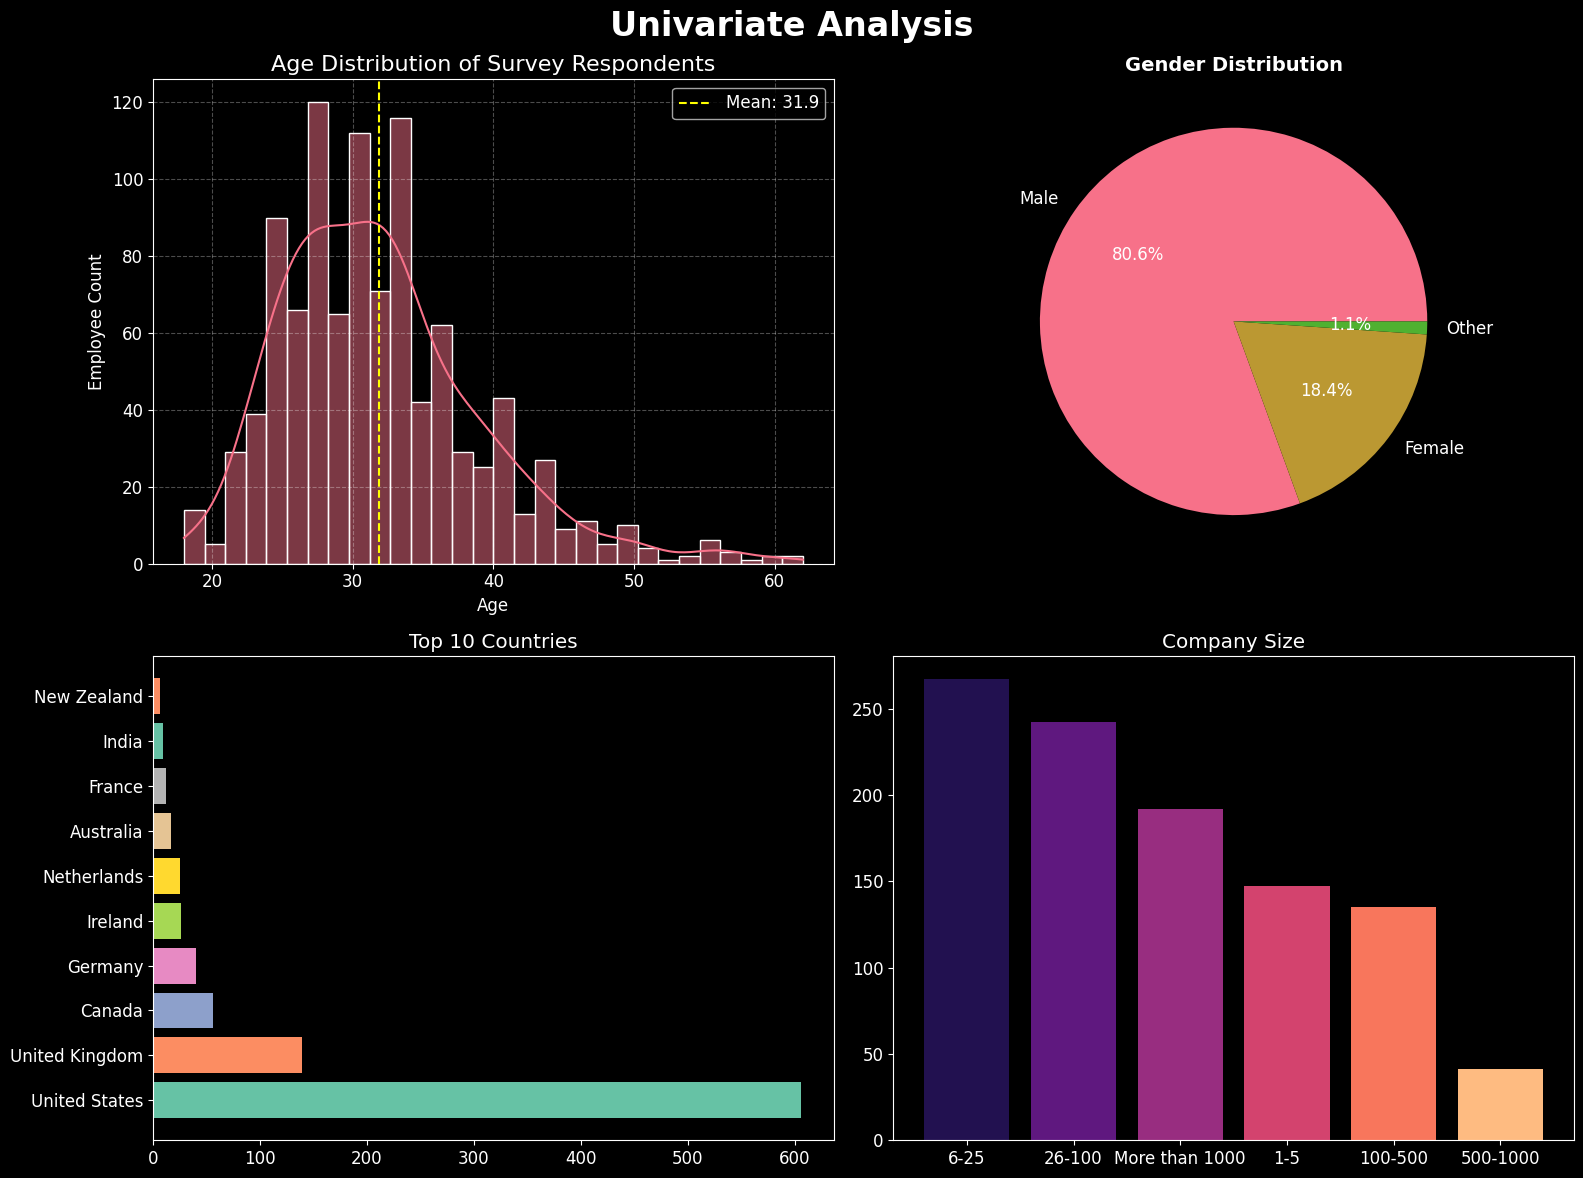

In [18]:
sns.set_palette("husl")
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle('Univariate Analysis', fontsize=24, fontweight = 'bold')

#Age Distribution
sns.histplot(df_new['Age'], kde=True, bins=30, ax=axes[0,0])
axes[0,0].set_title('Age Distribution of Survey Respondents', fontsize=16)
axes[0,0].axvline(df_new['Age'].mean(), color='yellow', linestyle='--', label=f'Mean: {df_new["Age"].mean():.1f}')
axes[0,0].grid(True, linestyle='--', alpha=0.3)
axes[0,0].legend()
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Employee Count')

#Gender distribution
axes[0,1].pie(df_new['Gender'].value_counts(), labels=df_new['Gender'].value_counts().index, autopct='%1.1f%%')
axes[0,1].set_title('Gender Distribution', fontsize=14, fontweight='bold')

#Country distribution (top 10)
top_countries = df_new['Country'].value_counts().head(10)
axes[1,0].barh(top_countries.index, top_countries.values, color=sns.color_palette("Set2"))
axes[1,0].set_title('Top 10 Countries')

#Company size distribution using 'no_employees'
sizes = df_new['no_employees'].value_counts()
axes[1,1].bar(sizes.index.astype(str), sizes.values, color=sns.color_palette("magma"))
axes[1,1].set_title('Company Size')

plt.tight_layout()
plt.show()

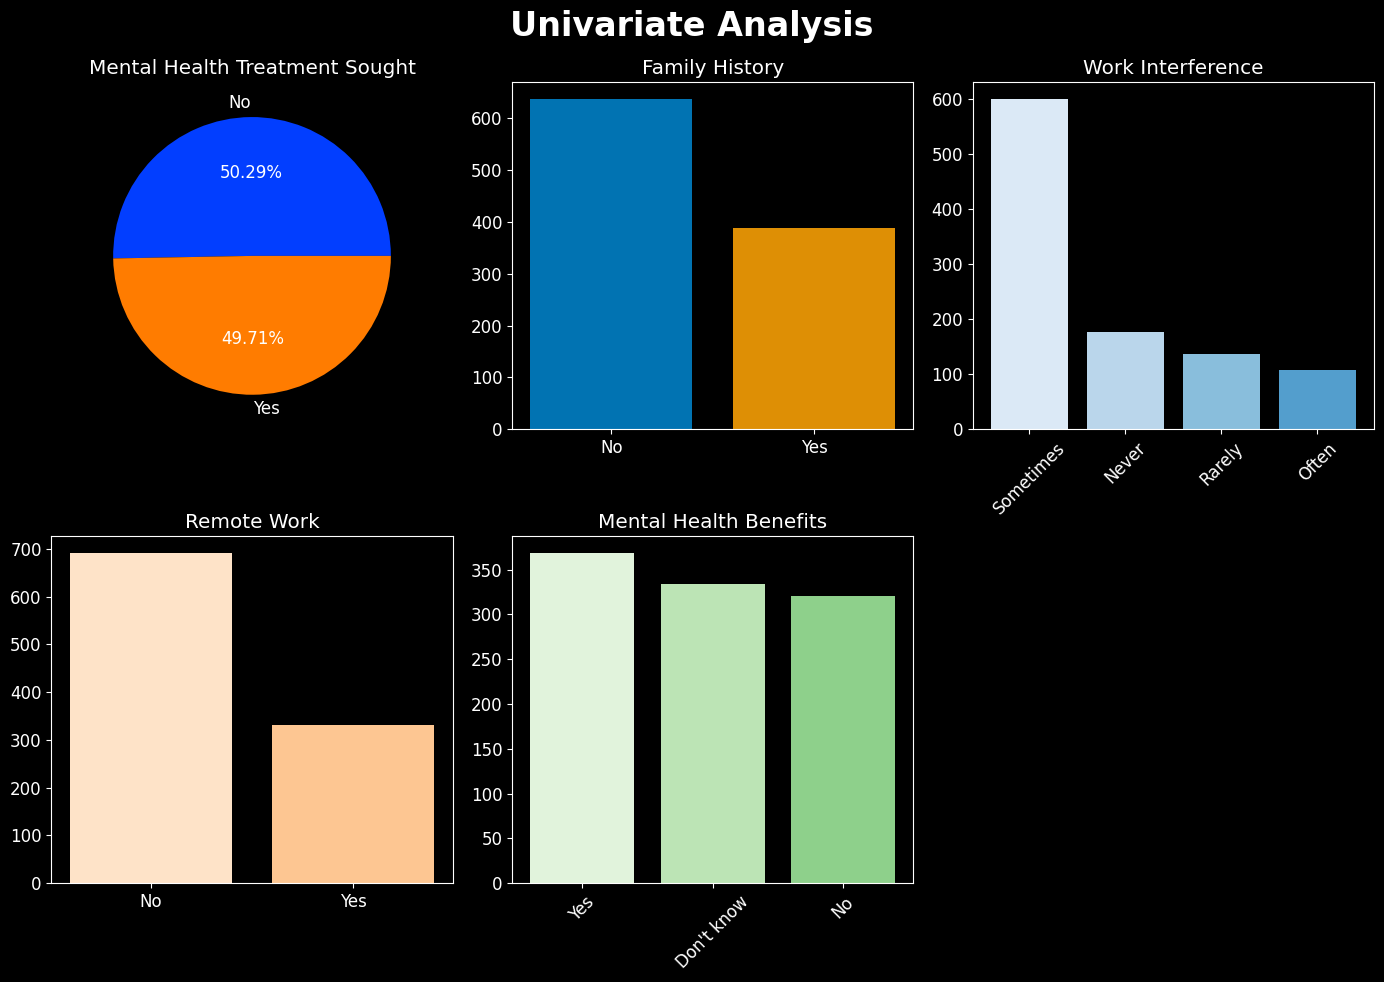

In [19]:
sns.set_palette("bright")
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle('Univariate Analysis', fontsize=24, fontweight = 'bold')

#Treatment seeking
axes[0, 0].pie(df_new['treatment'].value_counts(), labels=df_new['treatment'].value_counts().index, autopct='%1.2f%%')
axes[0, 0].set_title('Mental Health Treatment Sought')

#Family history
axes[0, 1].bar(df_new['family_history'].value_counts().index,
               df_new['family_history'].value_counts().values,color=sns.color_palette("colorblind"))
axes[0, 1].set_title('Family History')

#Work interference
axes[0, 2].bar(df_new['work_interfere'].value_counts().index,
               df_new['work_interfere'].value_counts().values,color=sns.color_palette("Blues"))
axes[0, 2].set_title('Work Interference')
axes[0, 2].tick_params(axis='x', rotation=45)

#Remote work
axes[1, 0].bar(df_new['remote_work'].value_counts().index,
               df_new['remote_work'].value_counts().values,color=sns.color_palette("Oranges"))
axes[1, 0].set_title('Remote Work')

#Mental health benefits
axes[1, 1].bar(df_new['benefits'].value_counts().index,
               df_new['benefits'].value_counts().values,color=sns.color_palette("Greens"))
axes[1, 1].set_title('Mental Health Benefits')
axes[1, 1].tick_params(axis='x', rotation=45)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

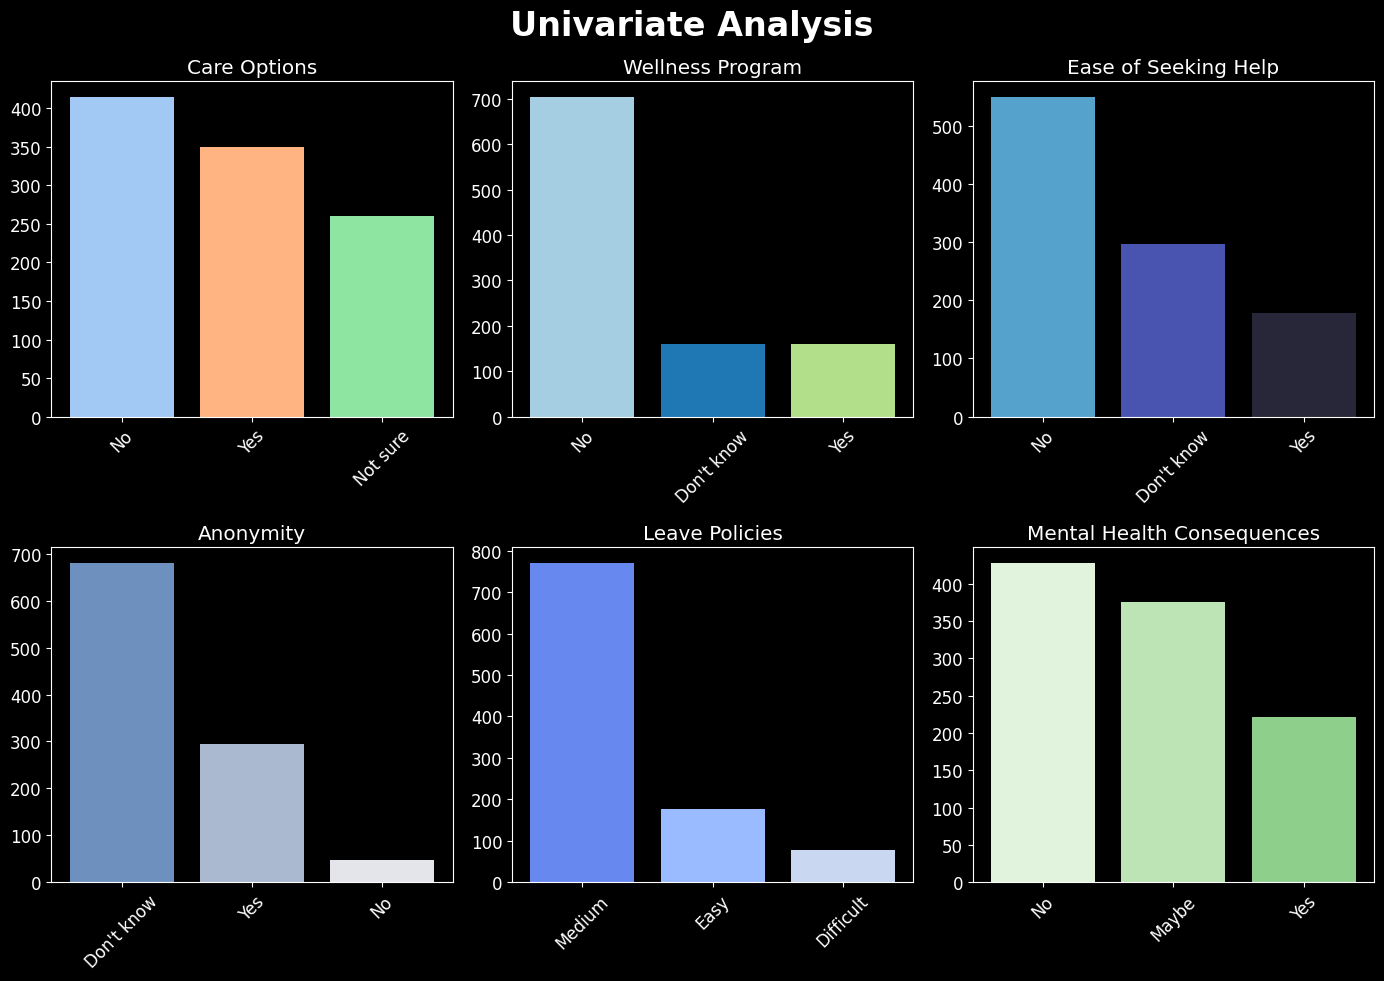

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle('Univariate Analysis', fontsize=24, fontweight = 'bold')

#Care options
axes[0, 0].bar(df_new['care_options'].value_counts().index,
               df_new['care_options'].value_counts().values,color=sns.color_palette("pastel"))
axes[0, 0].set_title('Care Options')
axes[0, 0].tick_params(axis='x', rotation=45)

#Wellness program
axes[0, 1].bar(df_new['wellness_program'].value_counts().index,
               df_new['wellness_program'].value_counts().values,color=sns.color_palette("Paired"))
axes[0, 1].set_title('Wellness Program')
axes[0, 1].tick_params(axis='x', rotation=45)

#Seek help ease
axes[0, 2].bar(df_new['seek_help'].value_counts().index,
               df_new['seek_help'].value_counts().values,color=sns.color_palette("icefire"))
axes[0, 2].set_title('Ease of Seeking Help')
axes[0, 2].tick_params(axis='x', rotation=45)

#Anonymity
axes[1, 0].bar(df_new['anonymity'].value_counts().index,
               df_new['anonymity'].value_counts().values,color=sns.color_palette("vlag"))
axes[1, 0].set_title('Anonymity')
axes[1, 0].tick_params(axis='x', rotation=45)

#Leave policies
axes[1, 1].bar(df_new['leave'].value_counts().index,
               df_new['leave'].value_counts().values,color=sns.color_palette("coolwarm"))
axes[1, 1].set_title('Leave Policies')
axes[1, 1].tick_params(axis='x', rotation=45)

#Mental health consequences
axes[1, 2].bar(df_new['mental_health_consequence'].value_counts().index,
               df_new['mental_health_consequence'].value_counts().values,color=sns.color_palette("Greens"))
axes[1, 2].set_title('Mental Health Consequences')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Bivariate Analysis

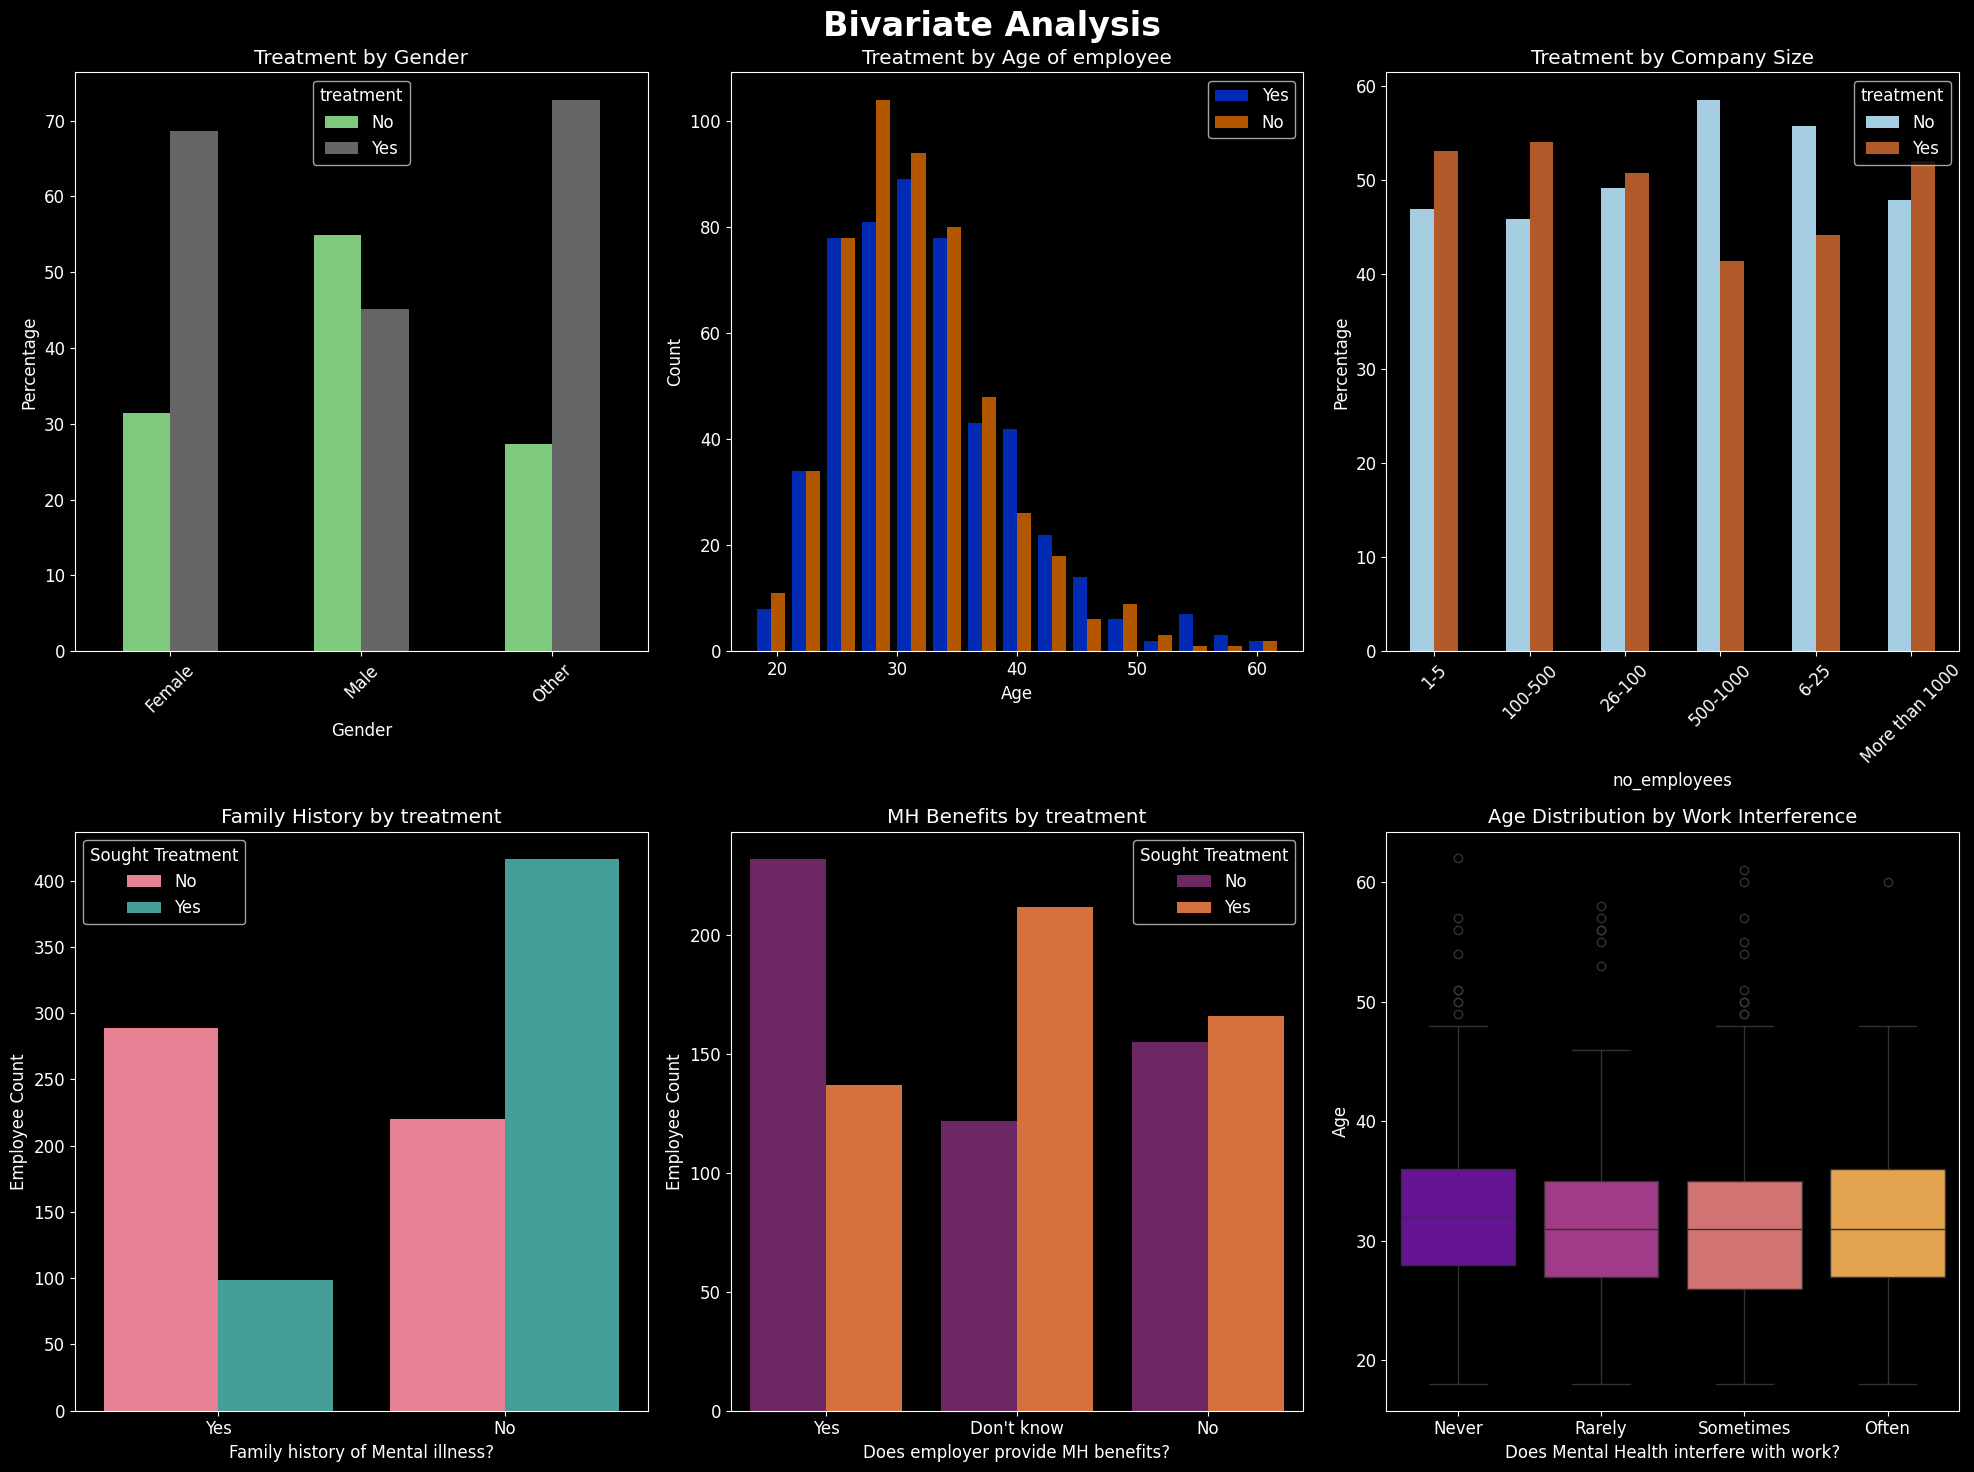

In [21]:
sns.set_palette("bright")

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Bivariate Analysis', fontsize=24, fontweight = 'bold')

#Gender vs Treatment
gender_pct = pd.crosstab(df_new['Gender'], df_new['treatment'], normalize='index') * 100
gender_pct.plot(kind='bar', ax=axes[0,0],colormap='Accent')
axes[0,0].set_title('Treatment by Gender')
axes[0,0].set_ylabel('Percentage')
axes[0,0].tick_params(axis='x', rotation=45)

#Age vs Treatment
axes[0,1].hist([df_new[df_new['treatment'] == 'Yes']['Age'],
                 df_new[df_new['treatment'] == 'No']['Age']],
                bins=15, label=['Yes', 'No'], alpha=0.7)
axes[0,1].set_title('Treatment by Age of employee')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Count')
axes[0,1].legend()

# Company size vs Treatment
company_pct = pd.crosstab(df_new['no_employees'], df_new['treatment'], normalize='index') * 100
company_pct.plot(kind='bar', ax=axes[0,2], colormap='Paired')
axes[0,2].set_title('Treatment by Company Size')
axes[0,2].set_ylabel('Percentage')
axes[0,2].tick_params(axis='x', rotation=45)

#Family History vs. Treatment
sns.countplot(ax=axes[1,0], x='family_history', hue='treatment', data=df_new, order=['Yes', 'No'], palette='husl')
axes[1,0].set_title('Family History by treatment')
axes[1,0].set_xlabel('Family history of Mental illness?')
axes[1,0].set_ylabel('Employee Count')
axes[1,0].legend(title='Sought Treatment', labels=['No', 'Yes'])

#Mental Health Benefits vs. Treatment
sns.countplot(ax=axes[1,1], x='benefits', hue='treatment', data=df_new, order=['Yes', "Don't know", 'No'], palette='inferno')
axes[1,1].set_title('MH Benefits by treatment')
axes[1,1].set_xlabel('Does employer provide MH benefits?')
axes[1,1].set_ylabel('Employee Count')
axes[1,1].legend(title='Sought Treatment', labels=['No', 'Yes'])

#Age Distribution vs. Work Interference
order_interference = ['Never', 'Rarely', 'Sometimes', 'Often']
sns.boxplot(data=df_new, x='work_interfere', y='Age', ax=axes[1,2], order=order_interference, palette='plasma')
axes[1,2].set_title('Age Distribution by Work Interference', fontsize=14)
axes[1,2].set_xlabel('Does Mental Health interfere with work?')
axes[1,2].set_ylabel('Age')

plt.tight_layout()
plt.show()

### Multivariate Analysis

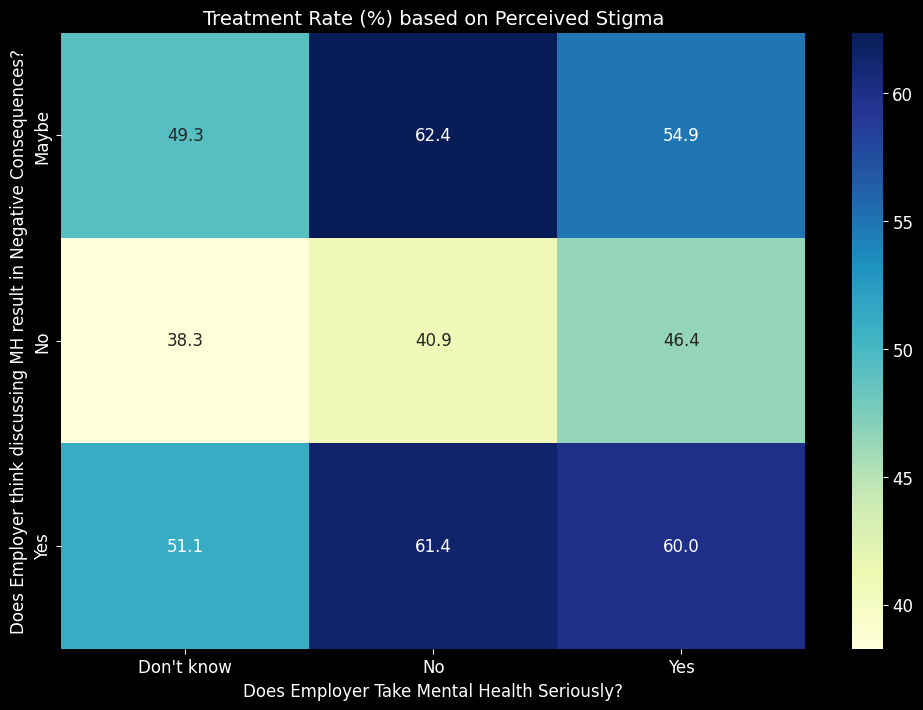

In [22]:
df_corr2 = df_new.copy()
df_corr2['treatment_numeric'] = df_corr2['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

#To understand the inter-relationships between 'treatment', mental_vs_physical' and 'mental_health_consequence' columns.
plt.figure(figsize=(12, 8))
culture_pivot = pd.crosstab(
    index=df_corr2['mental_health_consequence'],
    columns=df_corr2['mental_vs_physical'],
    values=df_corr2['treatment_numeric'],
    aggfunc='mean'
) * 100

sns.heatmap(culture_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Treatment Rate (%) based on Perceived Stigma', fontsize=14)
plt.ylabel('Does Employer think discussing MH result in Negative Consequences?')
plt.xlabel('Does Employer Take Mental Health Seriously?')

plt.show()

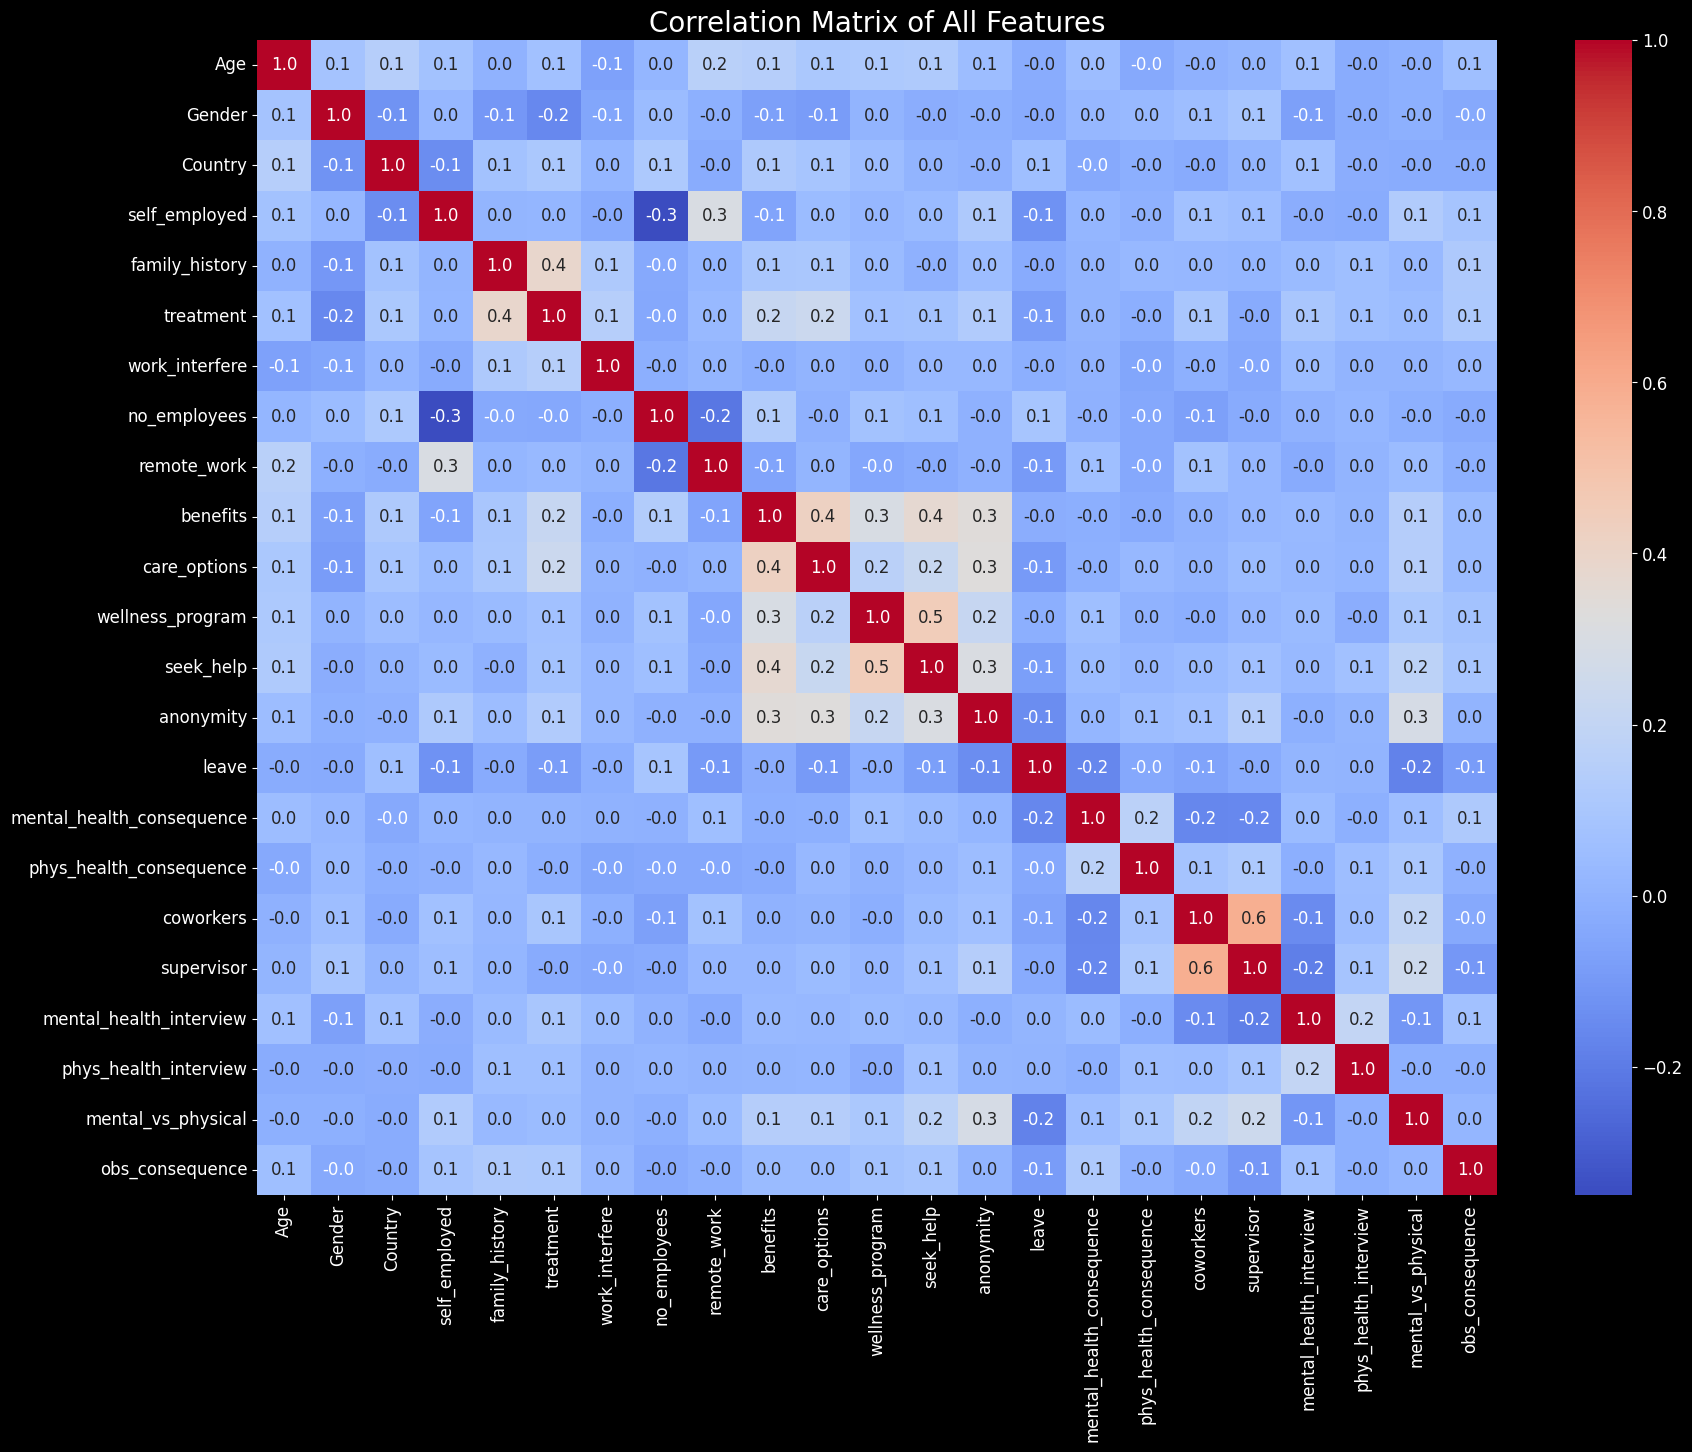

In [23]:
#To understand the inter-relationships between all attributes
from sklearn.preprocessing import LabelEncoder

df_corr = df_new.copy()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

plt.figure(figsize=(20, 15))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix of All Features', fontsize=20)
plt.show()

## Data Visualisation Ends!
### Thank you!